# RFM Analysis

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [62]:
df = pd.read_csv('../../data/cleaned_data.csv')
image_path = '/Users/zafer/Documents/GitHub/salesense/images/'

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [63]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [64]:
# Calculating Recency, Frequency, and Monetary

current_date = df['InvoiceDate'].max()
current_date

recency = df.groupby('CustomerID')['InvoiceDate'].max()
recency = (current_date - recency).dt.days

# Frequency
frequency = df.groupby('CustomerID')['InvoiceDate'].nunique()

# Monetary
monetary = df.groupby('CustomerID')['TotalPrice'].sum()

In [65]:
# Combining the Recency, Frequency, and Monetary in one useable dataframe

rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

In [66]:
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,3344.83
12348.0,74,4,1290.44
12349.0,18,1,1415.27
12350.0,309,1,214.00
12352.0,35,8,1677.26
12353.0,203,1,37.60
12354.0,231,1,741.54
12355.0,213,1,433.90


In [67]:
# Merging the values of 'InvoiceDate' in the rfm_df

rfm = pd.merge(rfm_df, df[['CustomerID','InvoiceDate']],on = 'CustomerID', how = 'inner')
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,InvoiceDate
0,12346.0,325,1,77183.60,2023-01-18 10:01:00
1,12347.0,1,7,3344.83,2023-10-31 12:25:00
2,12347.0,1,7,3344.83,2023-06-09 13:01:00
3,12347.0,1,7,3344.83,2023-10-31 12:25:00
4,12347.0,1,7,3344.83,2023-06-09 13:01:00


### Visualising the RFM data

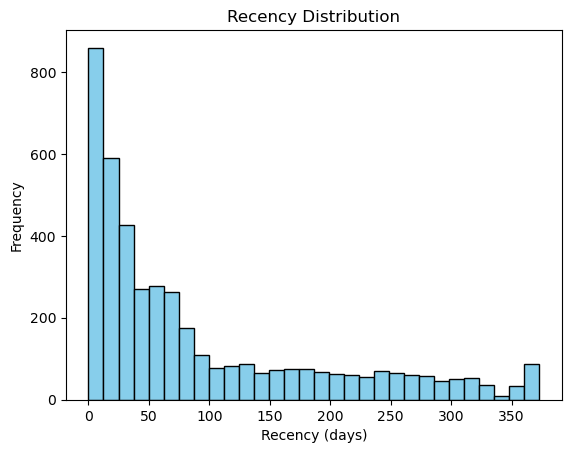

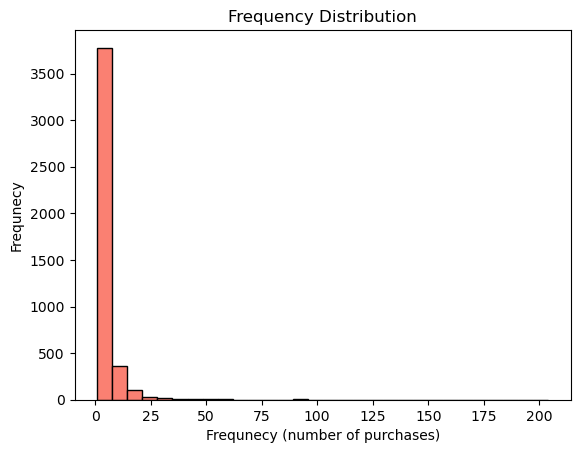

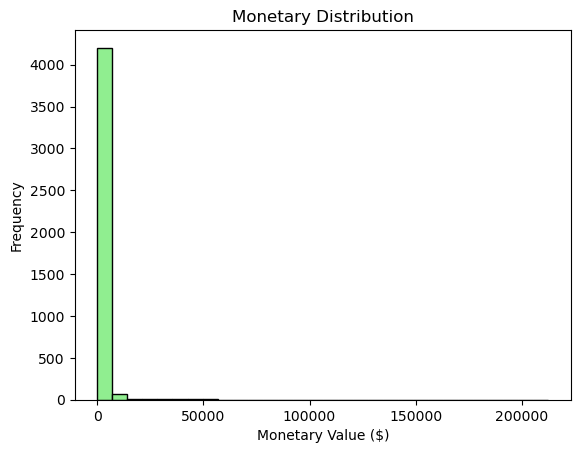

In [68]:


# Plotting a histogram for Recency

plt.hist(rfm_df['Recency'], bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

# Plotting a histogram for Frequency

plt.hist(rfm_df['Frequency'], bins = 30, color = 'salmon', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequnecy (number of purchases)')
plt.ylabel('Frequnecy')
plt.show()

# Plotting a histogram for Monetary
plt.hist(rfm_df['Monetary'], bins = 30, color = 'lightgreen', edgecolor = 'black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Frequency')
plt.show()


            Recency  Frequency  Monetary
Recency    1.000000  -0.261690 -0.118925
Frequency -0.261690   1.000000  0.553513
Monetary  -0.118925   0.553513  1.000000


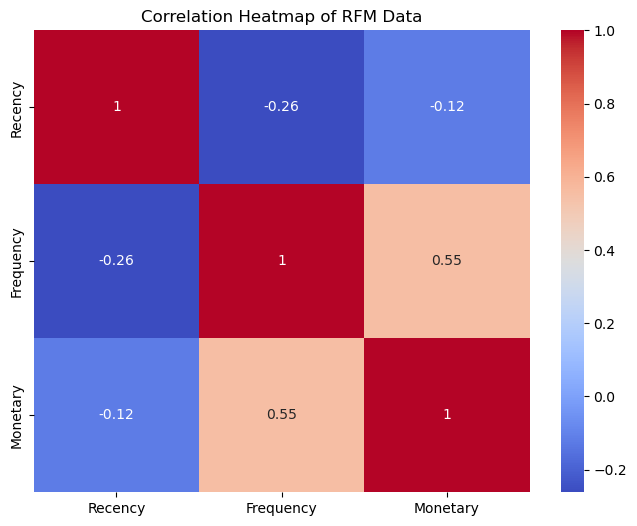

In [69]:
# Ploting a Heatmap, to visualise the correlation between the RFM variables

rfm_corr = rfm_df[['Recency', 'Frequency','Monetary']].corr()

print(rfm_corr)
# Creating the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(rfm_corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of RFM Data')
plt.show()

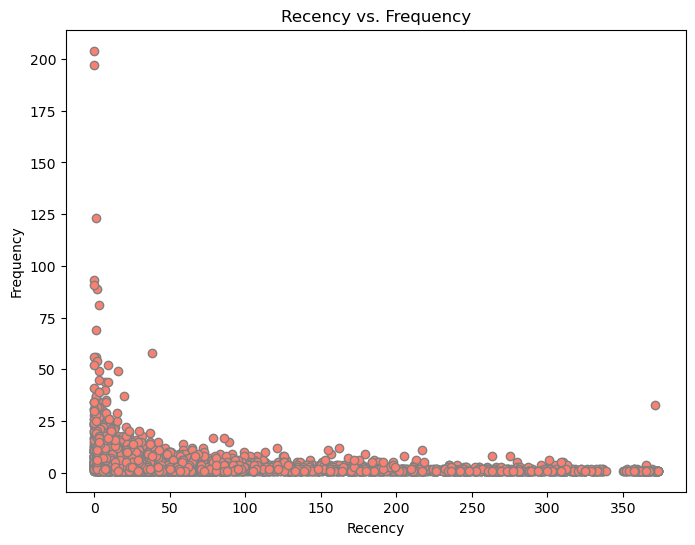

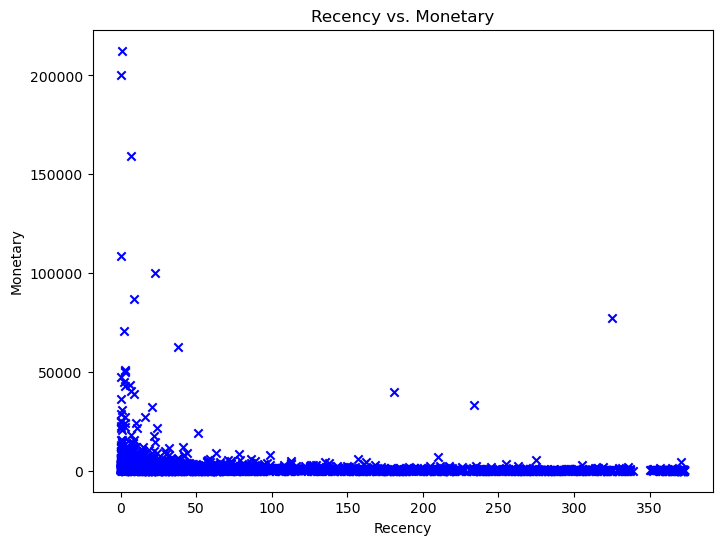

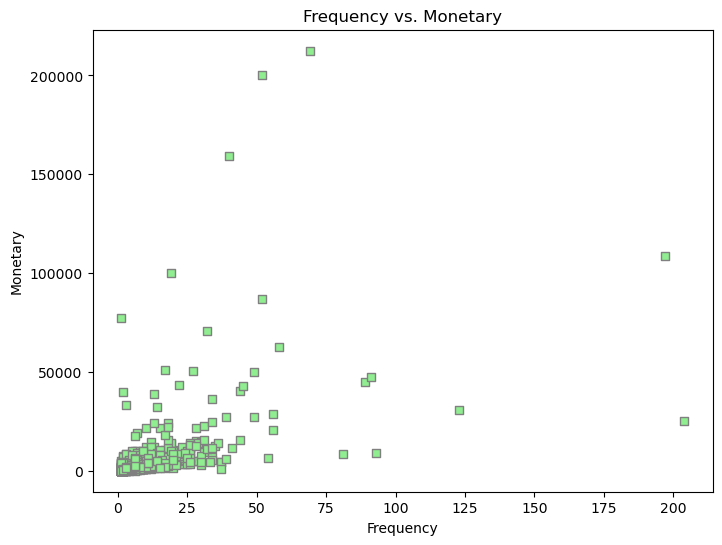

In [70]:
# Scatter plot
# R vs. F
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], color = 'salmon', marker = 'o', edgecolor='gray')
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# R vs. M
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Recency'], rfm_df['Monetary'], color = 'blue', marker = 'x')
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

# F vs. M
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Frequency'], rfm_df['Monetary'], color = 'lightgreen', marker = 's', edgecolor='gray')
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

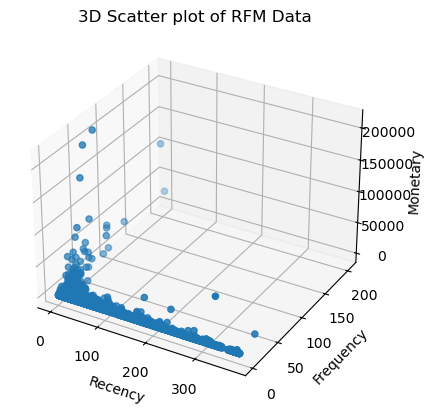

In [71]:
# Plotting a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('3D Scatter plot of RFM Data')
plt.show()

In [72]:
# Calculating the Customer Scores

rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4],duplicates='drop')  
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])  

# Combining the scores into one RFM score
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

In [73]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4318.000000,4318.000000,4318.000000
mean,91.585456,4.181566,1546.898336
std,100.093940,7.446382,6714.884560
min,0.000000,1.000000,1.250000
25%,17.000000,1.000000,228.697500
50%,50.000000,2.000000,511.160000
75%,141.000000,5.000000,1270.325000
max,373.000000,204.000000,212512.830000


In [74]:
print(rfm_df['RFMScore'].dtype)

object


In [75]:
#Converting the RFMScore Column to int

rfm_df['RFMScore'] = pd.to_numeric(rfm_df['RFMScore'])
print(rfm_df['RFMScore'].dtype)
rfm_df.head(10)

int64


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,1,7,3344.83,5,4,5,545
12348.0,74,4,1290.44,2,3,4,234
12349.0,18,1,1415.27,4,1,4,414
12350.0,309,1,214.00,1,1,2,112
12352.0,35,8,1677.26,3,4,5,345
12353.0,203,1,37.60,1,1,1,111
12354.0,231,1,741.54,1,1,4,114
12355.0,213,1,433.90,1,1,3,113


In [76]:
# Segementing Customers

def segment_customer_based_on_rfm_score(row):
    if row['RFMScore'] >= 500:
        return 'Şampiyonlar'
    elif 400 <= row['RFMScore'] < 500:
        return 'Sadık Müşteriler'
    elif 300 <= row['RFMScore'] < 400:
        return 'Potansiyel Sadık Olanlar'
    elif 200 <= row['RFMScore'] < 300:
        return 'Risk Altındaki Müşteriler'
    else:
        return 'Kaybedilmiş Müşteriler'

rfm_df['Segment'] = rfm_df.apply(segment_customer_based_on_rfm_score, axis=1)

rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,Kaybedilmiş Müşteriler
12347.0,1,7,3344.83,5,4,5,545,Şampiyonlar
12348.0,74,4,1290.44,2,3,4,234,Risk Altındaki Müşteriler
12349.0,18,1,1415.27,4,1,4,414,Sadık Müşteriler
12350.0,309,1,214.00,1,1,2,112,Kaybedilmiş Müşteriler


In [77]:
rfm_df = rfm_df.sort_values('RFMScore', ascending = False)
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Segment
CustomerID,,,,,,,,
13798.0,0,56,28542.18,5,4,5,545,Şampiyonlar
13756.0,1,14,4288.44,5,4,5,545,Şampiyonlar
16458.0,2,18,2639.64,5,4,5,545,Şampiyonlar
15194.0,2,15,5260.49,5,4,5,545,Şampiyonlar
15189.0,0,41,11473.52,5,4,5,545,Şampiyonlar


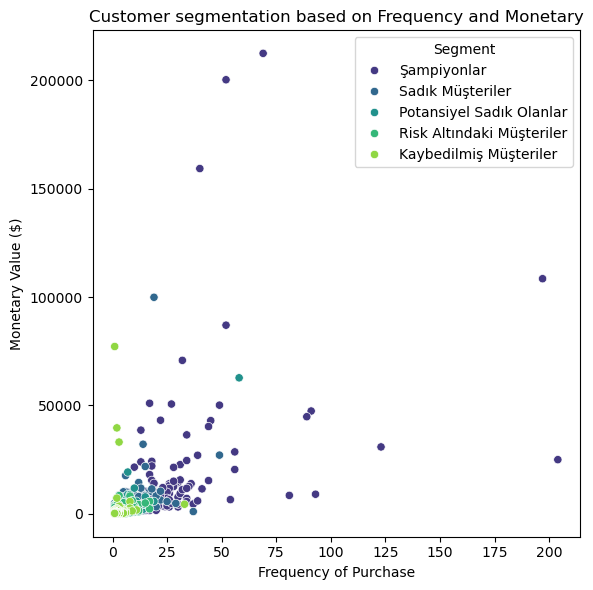

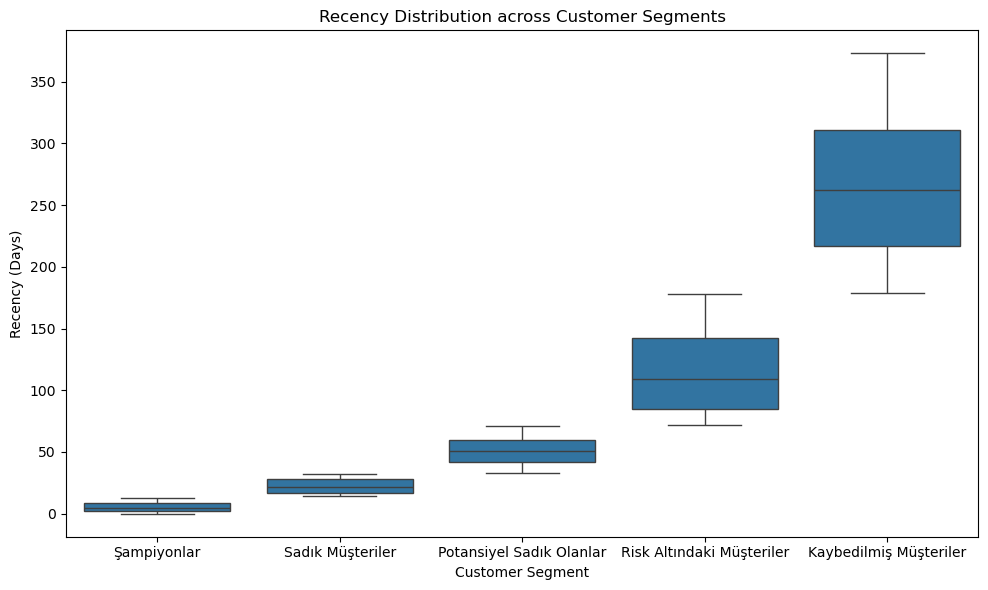

In [78]:
# Visualising the segments

plt.figure(figsize=(6,6))

# Scatter plot of Frequecy vs. Monetary, colored by segment
sns.scatterplot(x = 'Frequency', y='Monetary', hue = 'Segment', data = rfm_df, palette='viridis')
plt.title('Customer segmentation based on Frequency and Monetary')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Monetary Value ($)')
plt.tight_layout()
plt.show()

# Plot distribution of Recency scores across segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Recency', data=rfm_df)
plt.title('Recency Distribution across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Recency (Days)')
plt.tight_layout()
plt.show()

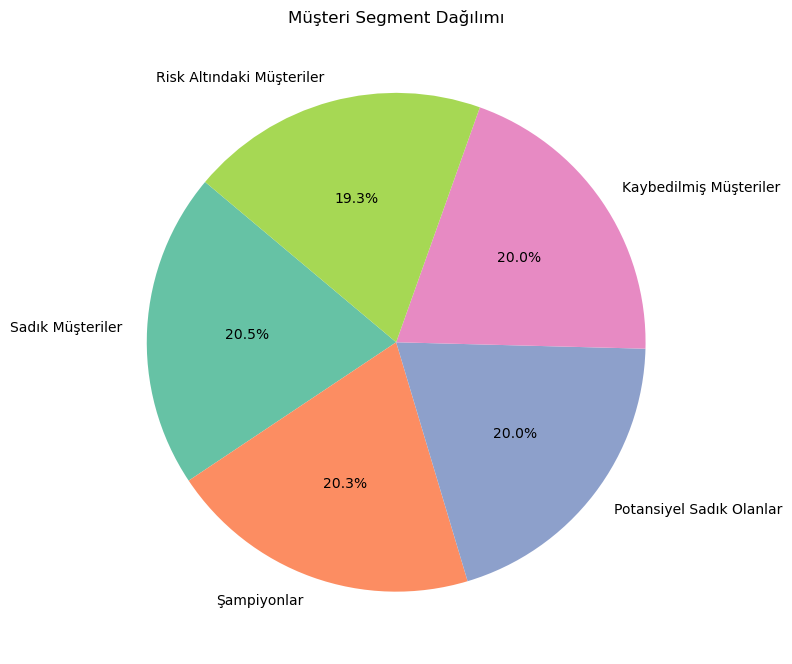

In [79]:
# Pie Chart of cutomer segments
segment_counts = rfm_df['Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Müşteri Segment Dağılımı')
plt.tight_layout()
plt.savefig(image_path + 'customer_segments_pie_chart.png')
plt.show()

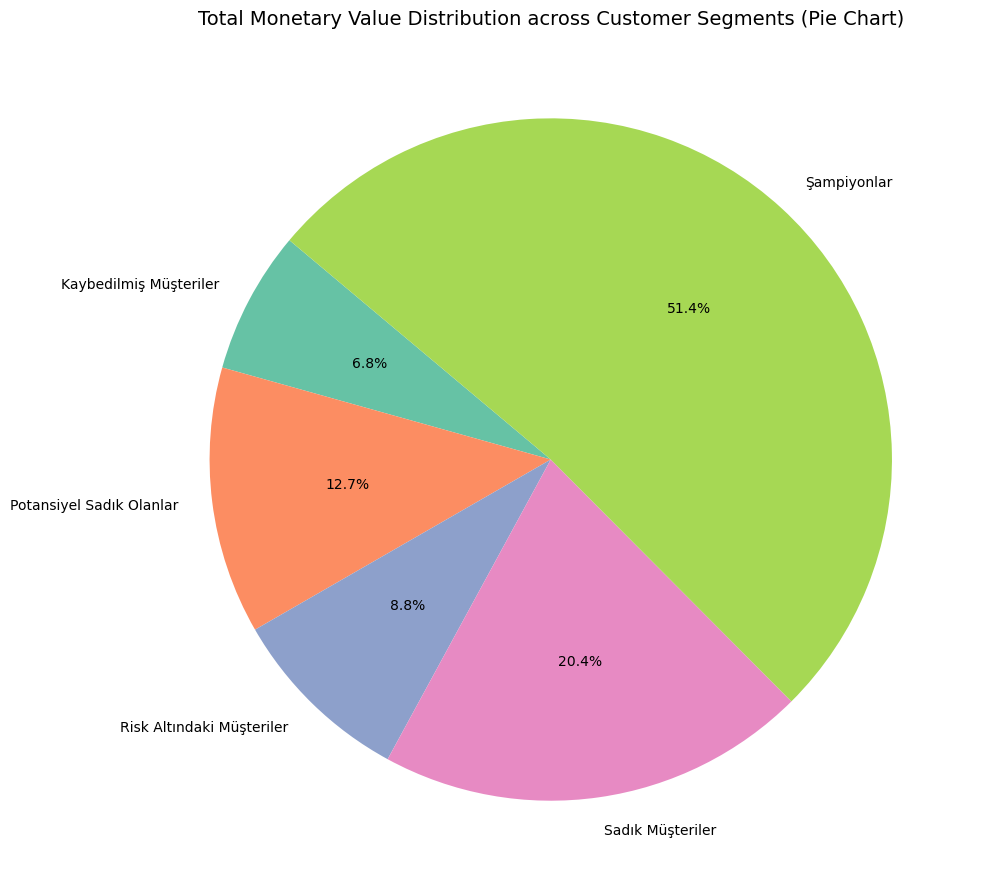

In [80]:
#Pie chart showing the distribution of the cutomer segments based on monetary expenditure

monetary_per_segment = rfm_df.groupby('Segment')['Monetary'].sum()
plt.figure(figsize=(10, 10))
plt.pie(monetary_per_segment, labels=monetary_per_segment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Total Monetary Value Distribution across Customer Segments (Pie Chart)', fontsize=14)
plt.tight_layout()
plt.show()